In [148]:
import numpy as np
%load_ext autoreload
%autoreload 2
from load_data import load_data
import torch
from modules import GNN
from train_model import train_model
from subgraph_relevance import subgraph_original, subgraph_mp_transcription, subgraph_mp_forward_hook, get_H_transform
from utils import create_ground_truth, get_feat_order_local_best_guess, get_auac_aupc, get_stats, get_all_walks, plot_mutagenicity
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
import pandas as pd
from io import StringIO
import pickle as pkl
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
# graphs, pos_idx, neg_idx = load_data('MUTAG')
# graphs, pos_idx, neg_idx = load_data('Mutagenicity')
graphs, pos_idx, neg_idx = load_data('REDDIT-BINARY')

num_graphs: 2000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

label is 0
374


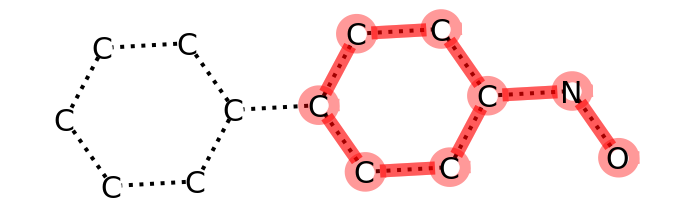

In [145]:
idx = 374

model_depth = 3
gammas = np.linspace(3,0,model_depth)

g = graphs[idx]
node_candidates = np.arange(g.nbnodes)
shape = (len(node_candidates),)*(model_depth +1)
rel_tensor = torch.zeros(*shape)
walks = get_all_walks(2, g.get_adj())

subgraph = [3,2,6,7,10,0,12,13]
    
print('label is', g.label)
sub_relevances = []
for walk in walks:
    a,b= walk
    if a in subgraph and b in subgraph:
        sub_relevances.append([walk, .4 ])
        pass

# plot_mutagenicity(g,sub_relevances,factor=1,figname='imgs/mol_mut_lohohist.eps',color='red',dataset='MUTAG')
plot_mutagenicity(g,sub_relevances,factor=1,figname='imgs/mol_mut_lohohist.eps',color='red')
print(idx)

In [167]:
tokens = {"2": [
    "that",
    "loves",
    "its",
    "characters",
    "and",
    "communicates",
    "something",
    "rather",
    "beautiful",
    "about",
    "human",
    "nature"
  ]}
nodes = list(range(14,26))
edges = [edge.split(' ') for edge in """15 14
17 16
15 17
17 18
17 19
17 20
20 21
20 22
22 23
23 24
23 25""".split('\n')]

In [177]:
G = nx.DiGraph()
min_idx = 14
for n in nodes:
    G.add_node(tokens['2'][n-min_idx])

for edge in edges:
    G.add_edge(tokens['2'][int(edge[0])-min_idx], tokens['2'][int(edge[1])-min_idx])

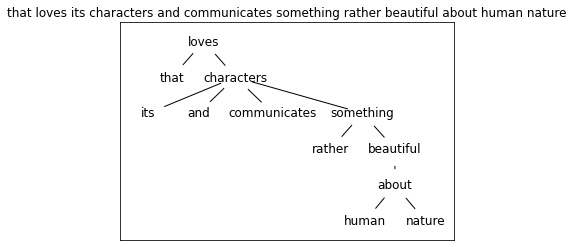

In [192]:
from networkx.drawing.nx_pydot import graphviz_layout

pos = graphviz_layout(G, prog="dot")
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 1000, node_color='white')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges, arrows=True)
plt.title(" ".join(tokens['2']))
plt.savefig("imgs/mol_mut_lohohist.eps", dpi=600, format='eps',bbox_inches='tight')

In [191]:
pos

{'that': (61.0, 306.0),
 'loves': (107.0, 378.0),
 'its': (27.0, 234.0),
 'characters': (153.0, 306.0),
 'and': (99.0, 234.0),
 'communicates': (207.0, 234.0),
 'something': (337.0, 234.0),
 'rather': (291.0, 162.0),
 'beautiful': (384.0, 162.0),
 'about': (384.0, 90.0),
 'human': (341.0, 18.0),
 'nature': (428.0, 18.0)}

In [190]:
" ".join(tokens['2'])

'that loves its characters and communicates something rather beautiful about human nature'